In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [7]:
df = pd.read_csv('./processed_csv.csv')

In [8]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7028,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7029,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7030,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [9]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [11]:
x_train.shape

(5625, 26)

In [12]:
x_test.shape

(1407, 26)

In [14]:
import tensorflow as tf
from tensorflow import keras

In [33]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 427us/step - loss: 0.5069 - accuracy: 0.7532
Epoch 2/100
176/176 [==============================] - 0s 363us/step - loss: 0.4366 - accuracy: 0.7915
Epoch 3/100
176/176 [==============================] - 0s 368us/step - loss: 0.4238 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 0s 370us/step - loss: 0.4193 - accuracy: 0.8000
Epoch 5/100
176/176 [==============================] - 0s 363us/step - loss: 0.4164 - accuracy: 0.7988
Epoch 6/100
176/176 [==============================] - 0s 368us/step - loss: 0.4151 - accuracy: 0.8028
Epoch 7/100
176/176 [==============================] - 0s 372us/step - loss: 0.4144 - accuracy: 0.8036
Epoch 8/100
176/176 [==============================] - 0s 371us/step - loss: 0.4127 - accuracy: 0.8032
Epoch 9/100
176/176 [==============================] - 0s 370us/step - loss: 0.4114 - accuracy: 0.8075
Epoch 10/100
176/176 [==============================] - 0s 375us/step - l

In [34]:
predicted_result = model.predict(x_test)

44/44 [==============================] - 0s 290us/step


In [35]:
predicted_result[:5]

array([[0.24411301],
       [0.4494306 ],
       [0.01057256],
       [0.74779177],
       [0.5424907 ]], dtype=float32)

In [36]:
y_test[:5]

2655    0
743     0
5570    1
64      1
3282    1
Name: Churn, dtype: int64

In [37]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 400us/step - loss: 0.4458 - accuracy: 0.7811


[0.44581371545791626, 0.7810945510864258]

In [38]:
y_pred = []
for val in predicted_result:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

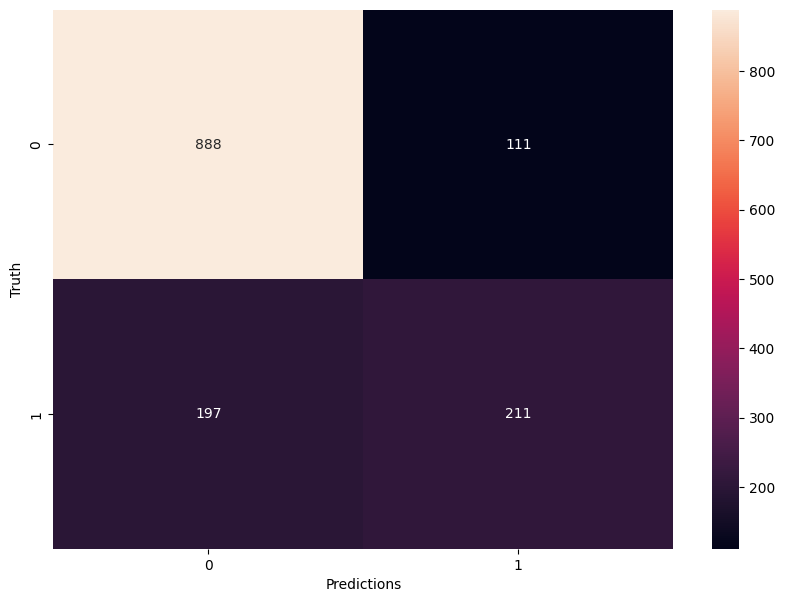

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')